In [1]:
import pandas as pd
import numpy as np

In [75]:
data = pd.read_csv("/home/tiago/Documentos/datasets/bodyPerformance.csv")
data.rename(columns={"body fat_%": "body_fat_%", "sit and bend forward_cm": "sit_and_bend_forward_cm",
                     "sit-ups counts": "sit_ups_counts", "broad jump_cm": "broad_jump_cm"}, inplace=True)
data

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [76]:
data["gender"].replace({"M": 0, "F": 1}, inplace=True)
data["class"].replace({"A": 1, "B": 2, "C": 3, "D": 4}, inplace=True)

In [77]:
data["age"] = data["age"].astype(np.int8)
data["diastolic"] = data["diastolic"].astype(np.int16)
data["systolic"] = data["systolic"].astype(np.int16)
data["sit_ups_counts"] = data["sit_ups_counts"].astype(np.int16)
data["broad_jump_cm"] = data["broad_jump_cm"].astype(np.int16)
data["gender"] = data["gender"].astype(np.int8)
data["class"] = data["class"].astype(np.int8)

In [78]:
data.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217,3
1,25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229,1
2,31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181,3
3,32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219,2
4,28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217,2


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'body_fat_%'}>,
        <Axes: title={'center': 'diastolic'}>],
       [<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'gripForce'}>,
        <Axes: title={'center': 'sit_and_bend_forward_cm'}>],
       [<Axes: title={'center': 'sit_ups_counts'}>,
        <Axes: title={'center': 'broad_jump_cm'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

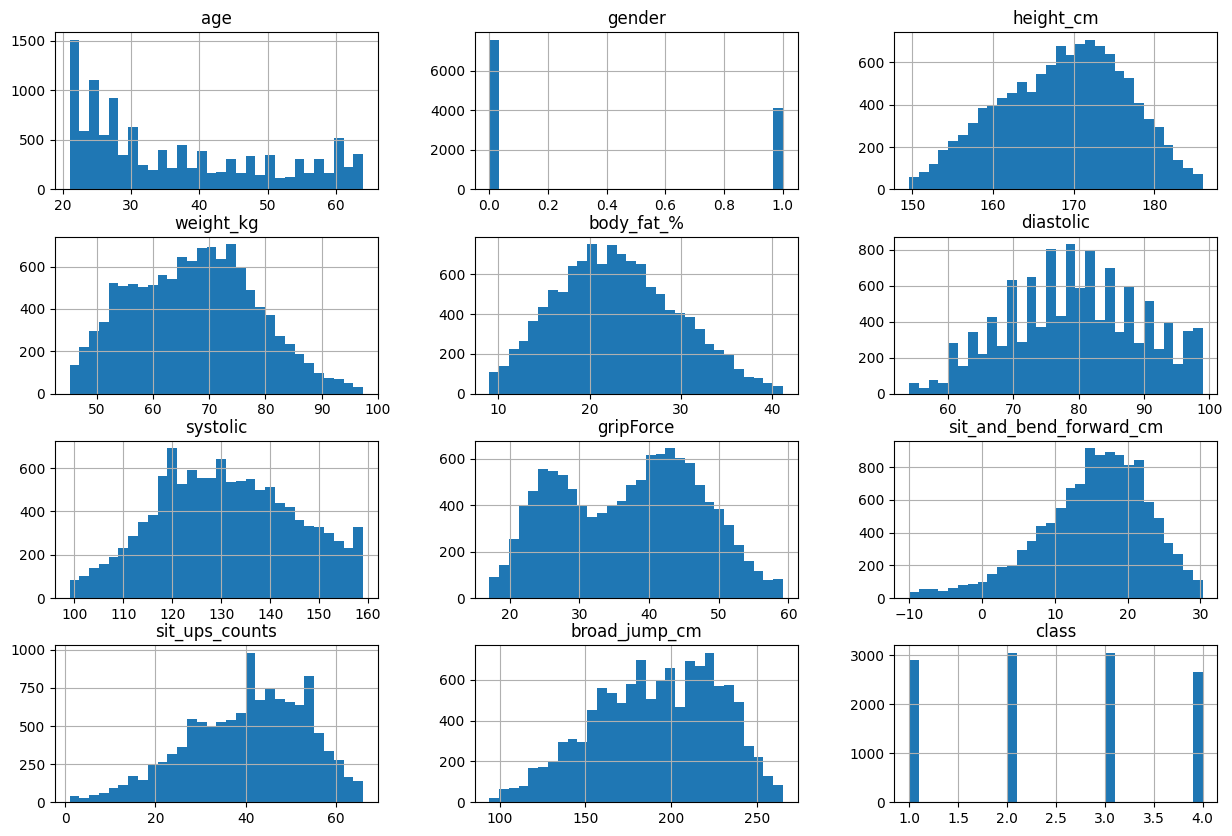

In [86]:
data.hist(bins=30, figsize=(15, 10))

<Axes: >

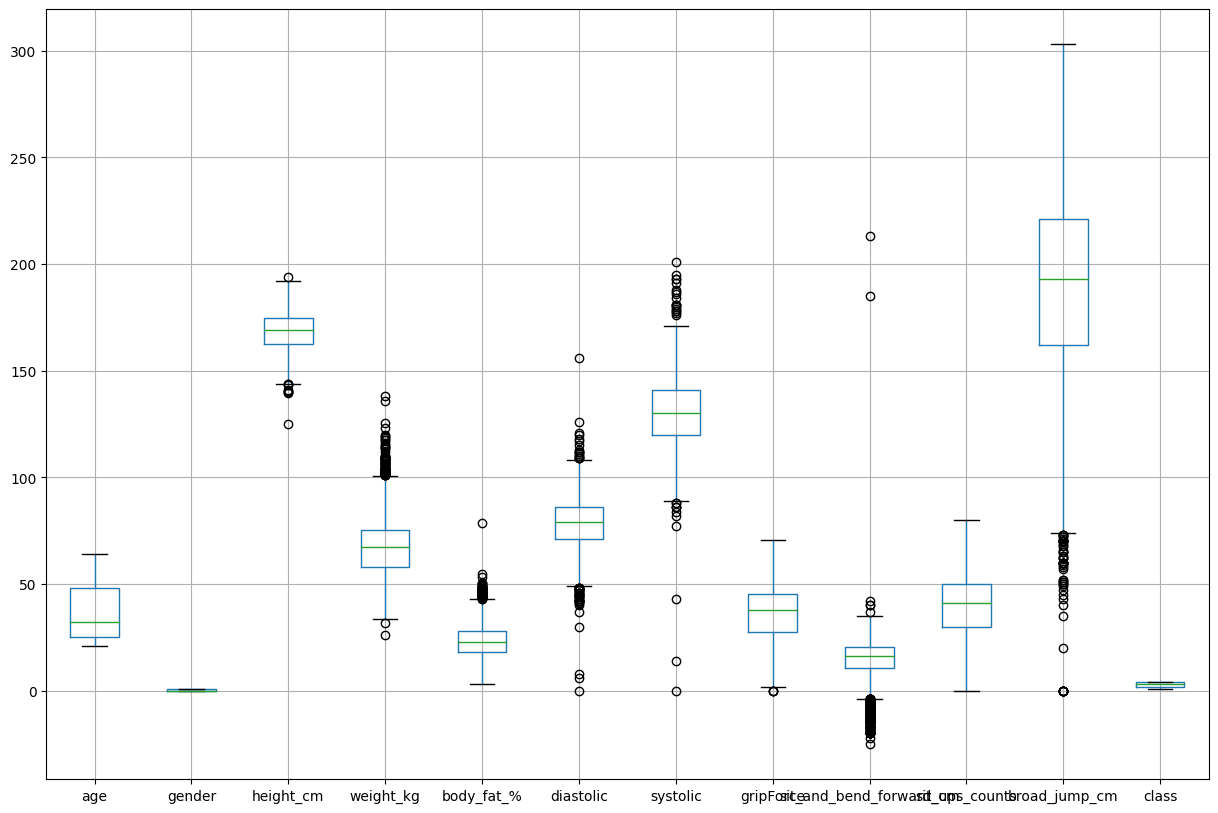

In [80]:
data.boxplot(figsize=(15, 10))

In [81]:
stats = data.describe(percentiles = [0.01, .25, .5, .75, 0.99], include="all").T
bounds = stats.loc[:, ["1%", "99%"]]

stats

,count,mean,std,min,1%,25%,50%,75%,99%,max
age,13393.0,36.775106,13.625639,21.0,21.000,25.0,32.0,48.0,64.000,64.0
gender,13393.0,0.367804,0.482226,0.0,0.000,0.0,0.0,1.0,1.000,1.0
height_cm,13393.0,168.559807,8.426583,125.0,149.600,162.4,169.2,174.8,186.000,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,45.100,58.2,67.4,75.3,97.400,138.1
body_fat_%,13393.0,23.240165,7.256844,3.0,9.000,18.0,22.8,28.0,41.200,78.4
diastolic,13393.0,78.796760,10.741959,0.0,54.000,71.0,79.0,86.0,99.000,156.0
systolic,13393.0,130.234749,14.714350,0.0,99.000,120.0,130.0,141.0,159.000,201.0
gripForce,13393.0,36.963877,10.624864,0.0,17.092,27.5,37.9,45.2,59.208,70.5
sit_and_bend_forward_cm,13393.0,15.209268,8.456677,-25.0,-10.000,10.9,16.2,20.7,30.300,213.0
sit_ups_counts,13393.0,39.771149,14.276853,0.0,1.000,30.0,41.0,50.0,66.000,80.0


In [82]:
bounds

,1%,99%
age,21.000,64.000
gender,0.000,1.000
height_cm,149.600,186.000
weight_kg,45.100,97.400
body_fat_%,9.000,41.200
diastolic,54.000,99.000
systolic,99.000,159.000
gripForce,17.092,59.208
sit_and_bend_forward_cm,-10.000,30.300
sit_ups_counts,1.000,66.000


In [83]:
# excluding outliers
for feature in bounds.index:
    data.drop(data[data[feature] > bounds.loc[feature, "99%"]].index, inplace=True)
    data.drop(data[data[feature] < bounds.loc[feature, "1%"]].index, inplace=True)

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11676.0,36.711545,13.504307,21.0,25.000,32.0,48.00,64.0
gender,11676.0,0.353203,0.477986,0.0,0.000,0.0,1.00,1.0
height_cm,11676.0,168.736793,7.790992,149.6,163.000,169.3,174.50,186.0
weight_kg,11676.0,67.332968,10.965474,45.1,58.700,67.5,75.00,97.4
body_fat_%,11676.0,23.052455,6.620262,9.0,18.175,22.7,27.60,41.2
diastolic,11676.0,79.090099,10.167569,54.0,72.000,79.0,86.25,99.0
systolic,11676.0,130.469853,14.017262,99.0,120.000,130.0,141.00,159.0
gripForce,11676.0,37.148617,9.920121,17.1,28.200,38.1,44.90,59.2
sit_and_bend_forward_cm,11676.0,15.326634,7.446994,-10.0,11.000,16.2,20.60,30.3
sit_ups_counts,11676.0,40.280661,13.056587,1.0,31.000,42.0,50.00,66.0


In [87]:
np.random.seed(42)

In [100]:
x=[1,2,3]
np.random.choice(x, 2, replace=False)

array([2, 3])

In [108]:
# dropping randomly performances on classes 3, 4 -> make an unbalanced dataset
unbalanced_data = data.copy()
class3 = unbalanced_data.loc[unbalanced_data["class"] == 3]
class4 = unbalanced_data.loc[unbalanced_data["class"] == 4]

drop3 = np.random.choice(class3.index, int(len(class3) * 0.75), replace=False)
drop4 = np.random.choice(class4.index, int(len(class4) * 0.75), replace=False)

unbalanced_data.drop(drop3, inplace=True)
unbalanced_data.drop(drop4, inplace=True)

In [109]:
unbalanced_data["class"].value_counts(1)

class
2    0.413443
1    0.393292
3    0.103057
4    0.090208
Name: proportion, dtype: float64

In [111]:
data.to_csv("./preprocessed_body_performance.csv", index=False)
unbalanced_data.to_csv("./preprocessed_body_performance_unbalanced.csv", index=False)